In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

In [132]:
data = pd.read_csv('CustomerData.csv')

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                60 non-null     int64  
 1   name                       60 non-null     object 
 2   gender                     50 non-null     object 
 3   age                        55 non-null     float64
 4   annual income (lakhs)      52 non-null     float64
 5   spending score             60 non-null     int64  
 6   items purchased (monthly)  60 non-null     int64  
 7   country                    60 non-null     object 
 8   category                   47 non-null     object 
 9   purchase type              60 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.8+ KB


In [134]:
data.head()

,customer_id,name,gender,age,annual income (lakhs),spending score,items purchased (monthly),country,category,purchase type
0,1,Edith,Female,NaN,40.9,27,62,Iran,Baby,offline
1,2,Sinclair,Male,53.0,NaN,42,47,China,NaN,online
2,3,Enoch,Male,22.0,NaN,70,26,China,Computers,offline
3,4,Lorenzo,Male,9.0,18.5,68,80,Russia,NaN,online
4,5,Damian,Male,55.0,18.4,69,89,Philippines,Jewelery,offline


In [135]:
data.tail()

,customer_id,name,gender,age,annual income (lakhs),spending score,items purchased (monthly),country,category,purchase type
55,56,Annamarie,NaN,36.0,42.3,54,55,Poland,Beauty,offline
56,57,Bari,Female,22.0,33.5,36,4,Ukraine,Movies,offline
57,58,Hersch,Male,0.0,57.2,77,58,Chile,Electronics,offline
58,59,Brocky,Male,NaN,17.3,34,34,China,NaN,online
59,60,Erna,Female,56.0,16.0,44,12,France,Beauty,offline


In [136]:
data.describe()

,customer_id,age,annual income (lakhs),spending score,items purchased (monthly)
count,60.000000,55.000000,52.000000,60.000000,60.000000
mean,30.500000,29.945455,35.578846,46.016667,51.333333
std,17.464249,18.669066,14.654964,26.076479,30.628815
min,1.000000,0.000000,11.200000,2.000000,1.000000
25%,15.750000,15.000000,22.225000,27.000000,25.750000
50%,30.500000,31.000000,35.150000,43.500000,57.000000
75%,45.250000,46.000000,50.325000,68.250000,75.250000
max,60.000000,59.000000,60.000000,100.000000,100.000000


In [137]:
data.isna().sum()

customer_id                   0
name                          0
gender                       10
age                           5
annual income (lakhs)         8
spending score                0
items purchased (monthly)     0
country                       0
category                     13
purchase type                 0
dtype: int64

In [138]:
data['gender']

0     Female
1       Male
2       Male
3       Male
4       Male
5     Female
6       Male
7       Male
8       Male
9        NaN
10      Male
11      Male
12       NaN
13      Male
14      Male
15    Female
16      Male
17      Male
18    Female
19       NaN
20       NaN
21      Male
22    Female
23      Male
24       NaN
25      Male
26    Female
27    Female
28      Male
29       NaN
30      Male
31    Female
32      Male
33    Female
34      Male
35    Female
36      Male
37      Male
38      Male
39      Male
40       NaN
41       NaN
42      Male
43      Male
44      Male
45    Female
46    Female
47    Female
48    Female
49      Male
50      Male
51      Male
52    Female
53       NaN
54      Male
55       NaN
56    Female
57      Male
58      Male
59    Female
Name: gender, dtype: object

In [139]:
data['gender'].fillna(data.gender.mode()[0],inplace=True)

In [140]:
data['gender']

0     Female
1       Male
2       Male
3       Male
4       Male
5     Female
6       Male
7       Male
8       Male
9       Male
10      Male
11      Male
12      Male
13      Male
14      Male
15    Female
16      Male
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24      Male
25      Male
26    Female
27    Female
28      Male
29      Male
30      Male
31    Female
32      Male
33    Female
34      Male
35    Female
36      Male
37      Male
38      Male
39      Male
40      Male
41      Male
42      Male
43      Male
44      Male
45    Female
46    Female
47    Female
48    Female
49      Male
50      Male
51      Male
52    Female
53      Male
54      Male
55      Male
56    Female
57      Male
58      Male
59    Female
Name: gender, dtype: object

In [141]:
data.isna().sum()

customer_id                   0
name                          0
gender                        0
age                           5
annual income (lakhs)         8
spending score                0
items purchased (monthly)     0
country                       0
category                     13
purchase type                 0
dtype: int64

In [142]:
data['age'].fillna(data.age.mean(),inplace=True)

In [143]:
data.age

0     29.945455
1     53.000000
2     22.000000
3      9.000000
4     55.000000
5     52.000000
6     19.000000
7     23.000000
8      0.000000
9      3.000000
10     8.000000
11    54.000000
12    10.000000
13    29.945455
14    33.000000
15    58.000000
16    59.000000
17    34.000000
18    42.000000
19    57.000000
20    21.000000
21    12.000000
22    15.000000
23     5.000000
24    40.000000
25     4.000000
26    46.000000
27    55.000000
28    35.000000
29    20.000000
30    56.000000
31    47.000000
32    57.000000
33    29.945455
34    25.000000
35    16.000000
36     1.000000
37    15.000000
38    11.000000
39    15.000000
40    51.000000
41     4.000000
42    31.000000
43    33.000000
44    39.000000
45    25.000000
46    41.000000
47    46.000000
48    46.000000
49    19.000000
50     7.000000
51    38.000000
52    36.000000
53    30.000000
54    29.945455
55    36.000000
56    22.000000
57     0.000000
58    29.945455
59    56.000000
Name: age, dtype: float64

In [144]:
data.isna().sum()

customer_id                   0
name                          0
gender                        0
age                           0
annual income (lakhs)         8
spending score                0
items purchased (monthly)     0
country                       0
category                     13
purchase type                 0
dtype: int64

In [145]:
data.category

0            Baby
1             NaN
2       Computers
3             NaN
4        Jewelery
5           Music
6             NaN
7          Beauty
8     Electronics
9           Games
10       Outdoors
11           Toys
12    Electronics
13       Outdoors
14          Music
15           Toys
16       Clothing
17          Shoes
18          Books
19          Books
20      Computers
21     Automotive
22       Jewelery
23         Health
24       Clothing
25     Automotive
26           Home
27           Baby
28            NaN
29    Electronics
30            NaN
31            NaN
32        Grocery
33           Kids
34       Outdoors
35          Shoes
36          Music
37           Baby
38          Music
39            NaN
40         Beauty
41          Games
42        Grocery
43            NaN
44            NaN
45         Garden
46      Computers
47          Games
48            NaN
49        Grocery
50            NaN
51            NaN
52         Beauty
53          Games
54       Outdoors
55        

In [146]:
data['category'].fillna(data.category.mode()[0],inplace=True)

In [147]:
data['category']

0            Baby
1          Beauty
2       Computers
3          Beauty
4        Jewelery
5           Music
6          Beauty
7          Beauty
8     Electronics
9           Games
10       Outdoors
11           Toys
12    Electronics
13       Outdoors
14          Music
15           Toys
16       Clothing
17          Shoes
18          Books
19          Books
20      Computers
21     Automotive
22       Jewelery
23         Health
24       Clothing
25     Automotive
26           Home
27           Baby
28         Beauty
29    Electronics
30         Beauty
31         Beauty
32        Grocery
33           Kids
34       Outdoors
35          Shoes
36          Music
37           Baby
38          Music
39         Beauty
40         Beauty
41          Games
42        Grocery
43         Beauty
44         Beauty
45         Garden
46      Computers
47          Games
48         Beauty
49        Grocery
50         Beauty
51         Beauty
52         Beauty
53          Games
54       Outdoors
55        

In [148]:
data.isna().sum()

customer_id                  0
name                         0
gender                       0
age                          0
annual income (lakhs)        8
spending score               0
items purchased (monthly)    0
country                      0
category                     0
purchase type                0
dtype: int64

In [149]:
data.rename(columns = {'annual income (lakhs)':'income','items purchased (monthly)':'items', 'purchase type ':'type','spending score':'score'},inplace=True)

In [150]:
data.head()

,customer_id,name,gender,age,income,score,items,country,category,type
0,1,Edith,Female,29.945455,40.9,27,62,Iran,Baby,offline
1,2,Sinclair,Male,53.000000,NaN,42,47,China,Beauty,online
2,3,Enoch,Male,22.000000,NaN,70,26,China,Computers,offline
3,4,Lorenzo,Male,9.000000,18.5,68,80,Russia,Beauty,online
4,5,Damian,Male,55.000000,18.4,69,89,Philippines,Jewelery,offline


In [151]:
data.dropna(axis=0,inplace=True)

In [152]:
data.head()

,customer_id,name,gender,age,income,score,items,country,category,type
0,1,Edith,Female,29.945455,40.9,27,62,Iran,Baby,offline
3,4,Lorenzo,Male,9.000000,18.5,68,80,Russia,Beauty,online
4,5,Damian,Male,55.000000,18.4,69,89,Philippines,Jewelery,offline
5,6,Drona,Female,52.000000,54.8,35,98,Indonesia,Music,offline
6,7,Sylvester,Male,19.000000,21.4,52,1,China,Beauty,online


In [153]:
data.tail()

,customer_id,name,gender,age,income,score,items,country,category,type
55,56,Annamarie,Male,36.000000,42.3,54,55,Poland,Beauty,offline
56,57,Bari,Female,22.000000,33.5,36,4,Ukraine,Movies,offline
57,58,Hersch,Male,0.000000,57.2,77,58,Chile,Electronics,offline
58,59,Brocky,Male,29.945455,17.3,34,34,China,Beauty,online
59,60,Erna,Female,56.000000,16.0,44,12,France,Beauty,offline


In [154]:
data['type'] = data['type'].map({'offline':1, 'online': 0})

In [155]:
data.head()

,customer_id,name,gender,age,income,score,items,country,category,type
0,1,Edith,Female,29.945455,40.9,27,62,Iran,Baby,1
3,4,Lorenzo,Male,9.000000,18.5,68,80,Russia,Beauty,0
4,5,Damian,Male,55.000000,18.4,69,89,Philippines,Jewelery,1
5,6,Drona,Female,52.000000,54.8,35,98,Indonesia,Music,1
6,7,Sylvester,Male,19.000000,21.4,52,1,China,Beauty,0


In [156]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
data[['category', 'gender']] = data[['category', 'gender']].apply(encoder.fit_transform)

In [157]:
data.head()

,customer_id,name,gender,age,income,score,items,country,category,type
0,1,Edith,0,29.945455,40.9,27,62,Iran,1,1
3,4,Lorenzo,1,9.000000,18.5,68,80,Russia,2,0
4,5,Damian,1,55.000000,18.4,69,89,Philippines,12,1
5,6,Drona,0,52.000000,54.8,35,98,Indonesia,15,1
6,7,Sylvester,1,19.000000,21.4,52,1,China,2,0


In [158]:
data['age'] = pd.cut(x = data['age'],labels=('child','adult','sc'), bins=(0,18,65,100), include_lowest=True)

In [159]:
data.head()

,customer_id,name,gender,age,income,score,items,country,category,type
0,1,Edith,0,adult,40.9,27,62,Iran,1,1
3,4,Lorenzo,1,child,18.5,68,80,Russia,2,0
4,5,Damian,1,adult,18.4,69,89,Philippines,12,1
5,6,Drona,0,adult,54.8,35,98,Indonesia,15,1
6,7,Sylvester,1,adult,21.4,52,1,China,2,0


<AxesSubplot:xlabel='score', ylabel='Count'>

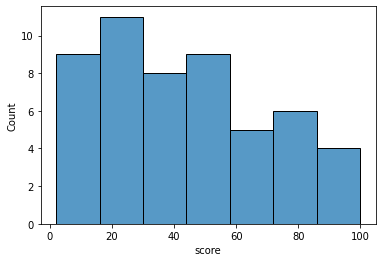

In [160]:
sns.histplot(data=data, x='score')

<AxesSubplot:xlabel='items'>

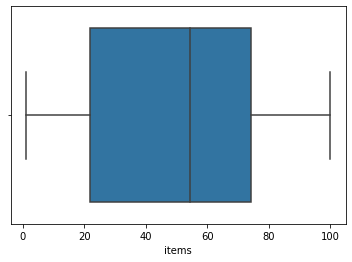

In [161]:
sns.boxplot(data=data, x='items')

<AxesSubplot:xlabel='income', ylabel='items'>

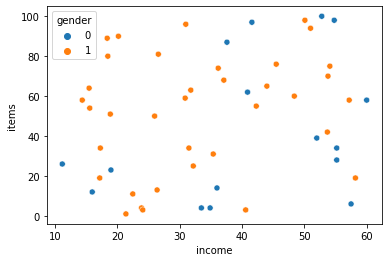

In [162]:
sns.scatterplot(data=data, x='income',y='items', hue='gender')

<AxesSubplot:xlabel='age', ylabel='items'>

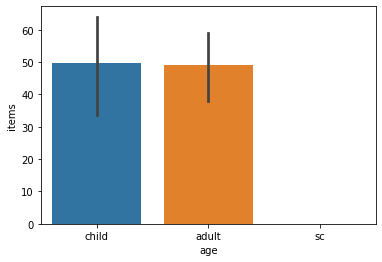

In [163]:
sns.barplot(data=data, x='age', y='items')

In [166]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
data[['income', 'score']] = scaler.fit_transform(data[['income', 'score']])

In [167]:
data.head()

,customer_id,name,gender,age,income,score,items,country,category,type
0,1,Edith,0,adult,0.608607,0.255102,62,Iran,1,1
3,4,Lorenzo,1,child,0.149590,0.673469,80,Russia,2,0
4,5,Damian,1,adult,0.147541,0.683673,89,Philippines,12,1
5,6,Drona,0,adult,0.893443,0.336735,98,Indonesia,15,1
6,7,Sylvester,1,adult,0.209016,0.510204,1,China,2,0


In [169]:
data.drop(columns=('customer_id'),axis=1,inplace=True)

In [170]:
data.head()

,name,gender,age,income,score,items,country,category,type
0,Edith,0,adult,0.608607,0.255102,62,Iran,1,1
3,Lorenzo,1,child,0.149590,0.673469,80,Russia,2,0
4,Damian,1,adult,0.147541,0.683673,89,Philippines,12,1
5,Drona,0,adult,0.893443,0.336735,98,Indonesia,15,1
6,Sylvester,1,adult,0.209016,0.510204,1,China,2,0


In [172]:
transaction_data = pd.read_csv('association_analysis.csv')

In [188]:
transaction_data.drop(columns=['tid'],axis=1,inplace=True)

In [189]:
transaction_data.head()

,onion,tomato,potato,bottleguard,beans
0,1,0,1,0,0
1,1,0,0,1,1
2,0,0,1,0,0
3,0,1,1,1,1
4,1,1,1,0,0


In [205]:
records = []
for i in range(len(transaction_data)):
    record = []
    for j in range(len(transaction_data.columns)):
        if transaction_data.values[i,j]:
            record.append(transaction_data.columns[j])
    records.append(record)

In [206]:
records

[['onion', 'potato'],
 ['onion', 'bottleguard', 'beans'],
 ['potato'],
 ['tomato', 'potato', 'bottleguard', 'beans'],
 ['onion', 'tomato', 'potato'],
 ['tomato', 'bottleguard', 'beans'],
 ['tomato'],
 ['onion', 'potato'],
 ['tomato', 'potato', 'beans'],
 ['tomato'],
 ['onion', 'tomato'],
 ['onion', 'tomato'],
 ['onion', 'beans'],
 ['tomato', 'bottleguard', 'beans'],
 ['onion', 'potato', 'bottleguard'],
 ['tomato', 'bottleguard', 'beans'],
 ['bottleguard'],
 ['tomato', 'bottleguard', 'beans'],
 ['onion', 'beans'],
 ['onion', 'tomato', 'beans'],
 ['onion', 'tomato', 'potato', 'bottleguard'],
 ['onion', 'tomato', 'potato', 'beans'],
 ['potato', 'bottleguard'],
 ['onion'],
 ['onion', 'tomato', 'potato', 'bottleguard', 'beans'],
 ['onion', 'tomato'],
 ['tomato', 'potato', 'bottleguard', 'beans'],
 ['onion', 'bottleguard'],
 ['onion', 'potato', 'bottleguard', 'beans'],
 ['tomato', 'beans'],
 ['onion', 'tomato', 'potato', 'bottleguard', 'beans'],
 ['potato'],
 ['tomato', 'potato'],
 ['potato'

In [207]:
!pip install apyori

You should consider upgrading via the 'c:\users\nimish bongale\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [238]:
from apyori import apriori
rules = apriori(records, min_support = 0.03, min_confidence = 0.7)

In [239]:
rules = list(rules)

In [244]:
for rule in rules:
    print("Rule : ", rule[0], "Support :", rule[1], "Confidence : ", rule[2][0][2])

Rule :  frozenset({'bottleguard', 'beans', 'tomato'}) Support : 0.19607843137254902 Confidence :  0.7692307692307693
Rule :  frozenset({'potato', 'beans', 'tomato'}) Support : 0.1568627450980392 Confidence :  0.7272727272727272
Rule :  frozenset({'bottleguard', 'potato', 'beans', 'tomato'}) Support : 0.09803921568627451 Confidence :  0.8333333333333334
Rule :  frozenset({'onion', 'potato', 'beans', 'tomato'}) Support : 0.09803921568627451 Confidence :  0.7142857142857142
Rule :  frozenset({'bottleguard', 'onion', 'potato', 'tomato'}) Support : 0.09803921568627451 Confidence :  0.7142857142857142
Rule :  frozenset({'onion', 'tomato', 'bottleguard', 'potato', 'beans'}) Support : 0.058823529411764705 Confidence :  0.75


In [241]:
!pip install pyfpgrowth

You should consider upgrading via the 'c:\users\nimish bongale\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [245]:
import pyfpgrowth
itemsets = pyfpgrowth.find_frequent_patterns(records, 0.03)

In [246]:
itemsets

{('beans', 'bottleguard', 'onion'): 6,
 ('beans', 'bottleguard', 'onion', 'potato'): 4,
 ('bottleguard', 'onion', 'tomato'): 6,
 ('bottleguard', 'onion', 'potato', 'tomato'): 5,
 ('beans', 'bottleguard', 'onion', 'tomato'): 3,
 ('beans', 'bottleguard', 'onion', 'potato', 'tomato'): 3,
 ('bottleguard', 'onion', 'potato'): 7,
 ('beans', 'bottleguard', 'potato'): 6,
 ('beans', 'bottleguard', 'potato', 'tomato'): 5,
 ('bottleguard', 'potato', 'tomato'): 8,
 ('beans', 'bottleguard'): 13,
 ('beans', 'bottleguard', 'tomato'): 10,
 ('bottleguard', 'tomato'): 14,
 ('beans', 'onion', 'potato'): 7,
 ('beans', 'onion', 'potato', 'tomato'): 5,
 ('beans', 'potato', 'tomato'): 8,
 ('beans', 'onion'): 13,
 ('beans', 'onion', 'tomato'): 7,
 ('beans', 'tomato'): 16,
 ('onion',): 26,
 ('onion', 'tomato'): 15,
 ('onion', 'potato'): 14,
 ('onion', 'potato', 'tomato'): 9,
 ('potato', 'tomato'): 15,
 ('tomato',): 29}

In [247]:
pyfpgrowth.generate_association_rules(itemsets, 0.7)

{('bottleguard', 'onion', 'potato'): (('tomato',), 0.7142857142857143),
 ('bottleguard', 'onion', 'tomato'): (('potato',), 0.8333333333333334),
 ('beans', 'bottleguard', 'onion', 'potato'): (('tomato',), 0.75),
 ('beans', 'bottleguard', 'onion', 'tomato'): (('potato',), 1.0),
 ('beans', 'bottleguard', 'potato'): (('tomato',), 0.8333333333333334),
 ('beans', 'bottleguard'): (('tomato',), 0.7692307692307693),
 ('bottleguard', 'tomato'): (('beans',), 0.7142857142857143),
 ('beans', 'onion', 'potato'): (('tomato',), 0.7142857142857143),
 ('beans', 'onion', 'tomato'): (('potato',), 0.7142857142857143)}

In [260]:
from sklearn.model_selection import train_test_split
features = data[['gender','income']]
target = data['type']
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=0, test_size = 0.3)

In [261]:
from sklearn.tree import DecisionTreeClassifier

model =  DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
model.score(x_test, y_test)

0.75

In [263]:
from sklearn import metrics
metrics.confusion_matrix(y_test, pred)

array([[8, 0],
       [4, 4]], dtype=int64)

In [265]:
metrics.classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.67      1.00      0.80         8\n           1       1.00      0.50      0.67         8\n\n    accuracy                           0.75        16\n   macro avg       0.83      0.75      0.73        16\nweighted avg       0.83      0.75      0.73        16\n'

In [268]:
roc = metrics.roc_curve(y_test,pred)

<AxesSubplot:>

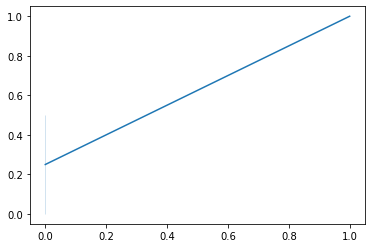

In [269]:
sns.lineplot(x=roc[0],y=roc[1])

In [272]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()
bag.fit(x_train,y_train)
pred = bag.predict(x_test)

In [273]:
metrics.confusion_matrix(y_test,pred)

array([[7, 1],
       [5, 3]], dtype=int64)

In [274]:
metrics.classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.58      0.88      0.70         8\n           1       0.75      0.38      0.50         8\n\n    accuracy                           0.62        16\n   macro avg       0.67      0.62      0.60        16\nweighted avg       0.67      0.62      0.60        16\n'

<AxesSubplot:>

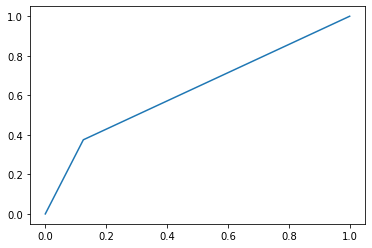

In [277]:
roc = metrics.roc_curve(y_test,pred)
sns.lineplot(x=roc[0], y=roc[1])

In [278]:
from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier()
boost.fit(x_train, y_train)
pred = boost.predict(x_test)

In [280]:
metrics.confusion_matrix(pred,y_test)

array([[7, 4],
       [1, 4]], dtype=int64)

In [281]:
metrics.classification_report(pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.88      0.64      0.74        11\n           1       0.50      0.80      0.62         5\n\n    accuracy                           0.69        16\n   macro avg       0.69      0.72      0.68        16\nweighted avg       0.76      0.69      0.70        16\n'

<AxesSubplot:>

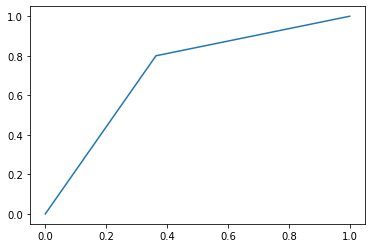

In [283]:
roc = metrics.roc_curve(pred,y_test)
sns.lineplot(x=roc[0],y=roc[1])

In [301]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(x_train, y_train)
pred = kmeans.predict(x_test)

In [302]:
metrics.confusion_matrix(pred,y_test)

array([[6, 6],
       [2, 2]], dtype=int64)

In [303]:
metrics.classification_report(pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.75      0.50      0.60        12\n           1       0.25      0.50      0.33         4\n\n    accuracy                           0.50        16\n   macro avg       0.50      0.50      0.47        16\nweighted avg       0.62      0.50      0.53        16\n'

<AxesSubplot:>

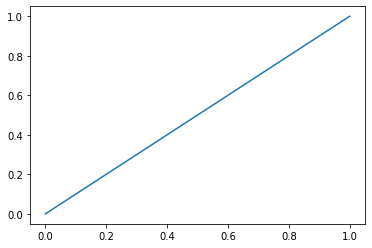

In [304]:
roc = metrics.roc_curve(y_test,pred)
sns.lineplot(x=roc[0],y=roc[1])

In [379]:
from sklearn.cluster import AgglomerativeClustering

agg =  AgglomerativeClustering(n_clusters=5)
clust = agg.fit_predict(data[['gender','category','type','score','items','income']])

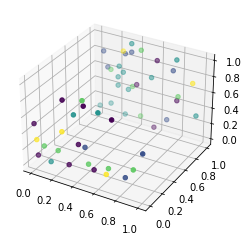

In [380]:
ax = plt.axes(projection='3d')
ax.scatter3D(data.score, data.type, data.income,c=clust,cmap='viridis')